<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train: 1.000, Test: 0.786


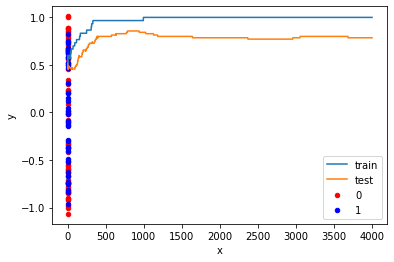

In [1]:
# https://machinelearningmastery.com/how-to-reduce-overfitting-with-dropout-regularization-in-keras/

from sklearn.datasets import make_circles
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot
from pandas import DataFrame

# Generate 2d classification dataset
# sklearn.datasets.make_circles(n_samples=100, shuffle=True, noise=None, random_state=None, factor=0.8)
# Make a large circle containing a smaller circle in 2d
# A simple toy dataset to visualize clustering and classification algorithms
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)
# noise: standard deviation of Gaussian noise added to the data

# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))   # dict() creates dictionaries
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()    # using the variable ax for single a Axes
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.savefig('figures/circlesdata.png')

# Split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# Define model
'''
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
'''

# Method 2:
# Create the Sequential model
model = Sequential([
    keras.layers.Dense(500, input_dim=2, activation="relu"),
    keras.layers.Dense(1, activation='sigmoid')
])

# Specify the loss function and the optimizer after a model is created
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train and Evaluate the Model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)

# Evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.savefig('figures/nodp.png')
pyplot.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

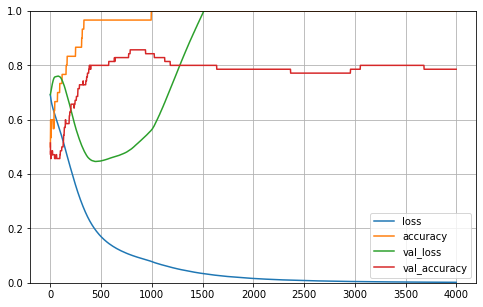

In [2]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [11]:
df.head()

,x,y,label
0,-0.636405,-0.368702,1
1,-0.244660,-0.736592,1
2,-0.465971,-1.066877,0
3,-0.709998,-0.408419,1
4,0.702322,-0.517301,1


In [3]:
history.history

{'loss': [0.6917765140533447,
  0.6884863376617432,
  0.6853471398353577,
  0.6823820471763611,
  0.6796137094497681,
  0.6769952774047852,
  0.6744909882545471,
  0.6721108555793762,
  0.6698542237281799,
  0.6677109599113464,
  0.6656497120857239,
  0.6636978387832642,
  0.6618196368217468,
  0.6600205302238464,
  0.6582947373390198,
  0.6566231846809387,
  0.6550069451332092,
  0.6534368991851807,
  0.6518952250480652,
  0.650388777256012,
  0.6489302515983582,
  0.6475170254707336,
  0.6461310982704163,
  0.6447634100914001,
  0.6434047818183899,
  0.642059862613678,
  0.6407371163368225,
  0.6394201517105103,
  0.6381222605705261,
  0.6368477940559387,
  0.635586142539978,
  0.6343384981155396,
  0.6331025958061218,
  0.6318711638450623,
  0.6306577324867249,
  0.6294599175453186,
  0.6282719373703003,
  0.627100944519043,
  0.6259386539459229,
  0.624779462814331,
  0.6236165165901184,
  0.6224530935287476,
  0.6212840676307678,
  0.6201087832450867,
  0.6189371943473816,
  0.617